# Predict the width of a ship

In [1]:
# Cell to hide - just an option and import other functions

import pandas as pd
pd.set_option('display.max_columns', 27)

%run 1-functions.ipynb

Your customer would like a model that is able to predict the width of a ship, knowing its length. For this first task, the model will take only the length attribute as an input, and predict the width. You can use the static dataset: let's import it first.

In [2]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

## Detect the missing data

There are simple ways to detect missing values with Pandas. First, we can see it with the method ``info()`` that we saw earlier:

In [3]:
static_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TripID      1520 non-null   int64  
 1   MMSI        1520 non-null   int64  
 2   MeanSOG     1520 non-null   float64
 3   VesselName  1442 non-null   object 
 4   IMO         538 non-null    object 
 5   CallSign    1137 non-null   object 
 6   VesselType  1287 non-null   float64
 7   Length      1220 non-null   float64
 8   Width       911 non-null    float64
 9   Draft       496 non-null    float64
 10  Cargo       378 non-null    float64
 11  DepTime     1520 non-null   object 
 12  ArrTime     1520 non-null   object 
 13  DepLat      1520 non-null   float64
 14  DepLon      1520 non-null   float64
 15  ArrLat      1520 non-null   float64
 16  ArrLon      1520 non-null   float64
 17  DepCountry  1520 non-null   object 
 18  DepCity     1520 non-null   object 
 19  ArrCountry  1520 non-null  

We can see that the attributes ``VesselName``, ``IMO``, ``CallSign``, ``VesselType``, ``Length``, ``Width``, ``Draft``, ``Cargo`` contain less than ``1520`` values, meaning some of these values are missing.

Another way to detect the missing values in the dataset is with the use of the function [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html). For example, we can easily get the total number of missing values for the attribute ``Length``:

In [4]:
static_data['Length'].isna().sum()

300

## Do the predictions

We can put both attribute names in two variables: ``x`` (containing a list of the [predictive variables](./../../introduction/0-2-supervised-learning.html), here only length) and ``y`` (containing a list of the predicted variable). In general, and in the scope of this course, the list ``y`` will always contain only one variable, as we only want to predict one attribute at a time.

In [5]:
# Prediction of Width from Length

x = ['Length']
y = ['Width']

As the prediction of the width of a ship is a [regression problem](./../../introduction/0-2-supervised-learning.html), we use the function [knn_regression()](./../../appendix/A-1-2-algorithms.html) to make the prediction. Then we can calculate the [MAE](./../../introduction/0-2-supervised-learning.html) with the method [mean_absolute_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) from the ``sklearn`` library.

In [6]:
from sklearn.metrics import mean_absolute_error

pred1, ytest1 = knn_regression(static_data, x, y)
print('MAE with all data: ' + str(mean_absolute_error(pred1, ytest1)))

MAE with all data: 2.73451052631579


In the previous part, we already identified that the length and width attributes contain some missing values. We can try to make a prediction on a selected part of the dataset, that doesn't contain missing values. For that, we use the method [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) on the dataframe. This method simply removes from the dataset the rows that contain missing values. We use it only on the columns that we use for the prediction, to avoid the drop or rows that contain missing values for other attributes but not for length or width.

Then, we make a new prediction on the selected dataset and print the MAE.

In [7]:
static_selected = static_data[[x[0], y[0]]].dropna()

pred2, ytest2 = knn_regression(static_selected, x, y)
print('MAE without NaN: ' + str(mean_absolute_error(pred2, ytest2)))

MAE without NaN: 1.3051934065934065


The error dropped (this means that the performance of the model increased when we removed the missing data). Before coming to any conclusion, we need to analyze in details the reason of this increase of performance.

## Analyze the results

Originally, the [KNN algorithm](./../../appendix/A-1-2-algorithms.html) cannot handle missing values. This means that, in the function ``knn_regression()``, an additional step has been taken to ensure that the prediction was not made on a dataset containing missing values. The basic action that we chose here is to replace every missing value with ``0``.

Let's have a look at the number of missing values for each attribute, to get an idea on how much of the dataset was replaced by ``0`` value:

In [8]:
print('Number of instances in the dataset: ' + str(len(static_data)))
print('Number of missing values for Length: ' + str(static_data['Length'].isnull().sum()))
print('Number of missing values for Width: ' + str(static_data['Width'].isnull().sum()))

Number of instances in the dataset: 1520
Number of missing values for Length: 300
Number of missing values for Width: 609


As we can see, for the predicted attribute ``Width``, more than a third of the dataset was containing missing values, that were replaced by zero value.

To go further, we can compare the distribution of the dataset with missing values, and the one with replaced 0 values. To replace all missing values in the dataset, we use the function [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html), with the parameter ``value = 0``. This parameter can be changed to any value, for example, we could decide to fill the missing values with the mean value of the rest of the Series.

We plot the two considered attributes together (see [this page](./../../introduction/python/0-5-7-plot.html) for more information about plotting with Python). This allows us to understand how the KNN algorithm makes predictions according to the value of the Length attribute.

Text(0.5, 1.0, 'Width vs. Length with NaN dropped (blue) or filled with zeros (orange)')

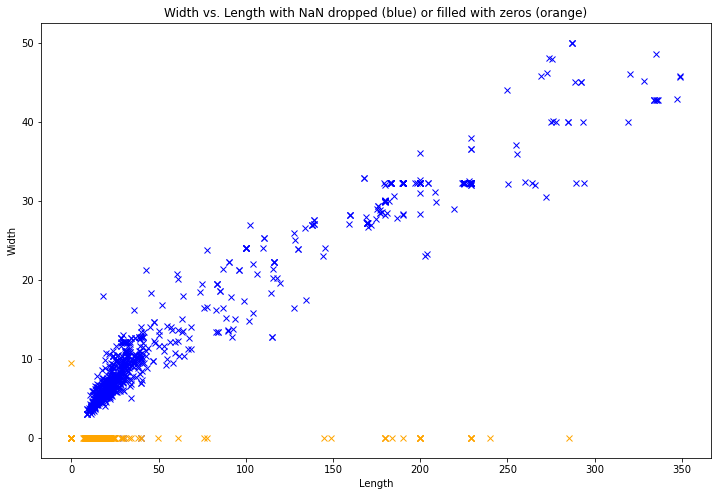

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))

# missing values dropped (blue)
static_selected = static_data[[x[0], y[0]]].dropna()
plt.plot(static_selected['Length'], static_selected['Width'], 'x', color = 'blue')

# missing values filled with zeros (orange)
static_zeros = static_data.fillna(value = 0)
static_zeros = static_zeros.loc[static_zeros['Length'] == 0].append(static_zeros.loc[static_zeros['Width'] == 0])
plt.plot(static_zeros['Length'], static_zeros['Width'], 'x', color = 'orange')

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Width vs. Length with NaN dropped (blue) or filled with zeros (orange)')

In [10]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']

def plot_2att(mode):
    if mode == 'filled_zeros':
        df = static_data.fillna(value = 0)
        title = 'Width vs. Length with NaN filled with zero values'
    elif mode == 'drop_na':
        df = static_data[[x[0], y[0]]].dropna()
        title = 'Width vs. Length with NaN dropped'
    
    plt.figure(figsize = (12, 8))
    plt.plot(df['Length'], df['Width'], 'x')
    plt.xlabel('Length')
    plt.ylabel('Width')
    plt.title(title)

interact(plot_2att,
         mode = widgets.Dropdown(options = modes,
                                 value = modes[0],
                                 description = 'Mode:',
                                 disabled = False,))

interactive(children=(Dropdown(description='Mode:', options=('filled_zeros', 'drop_na'), value='filled_zeros')…

<function __main__.plot_2att(mode)>

We can see that the attribute ``Width`` contains more zero values than the attribute ``Length``: for the prediction, as the KNN algorithm bases its results on the value of the attribute ``Length``, the predictions will stay on the diagonal more than predict 0 values. This will lead to a greater error, as we will see now.

Now we can have a look at the predictions made by the KNN algorithms, for both cases: we plot the predictions versus the true values (we got these lists when we used the function ``knn_regression()``): the more the plot shows a diagonal, the better the prediction was. The line of perfect prediction has been plotted as a black diagonal (to understand more about this prediction graph, see [this page](./../../introduction/0-3-graphs.html)).

Text(0.5, 1.0, 'Prediction vs. true label with NaN dropped (blue) filled with zeros (orange)')

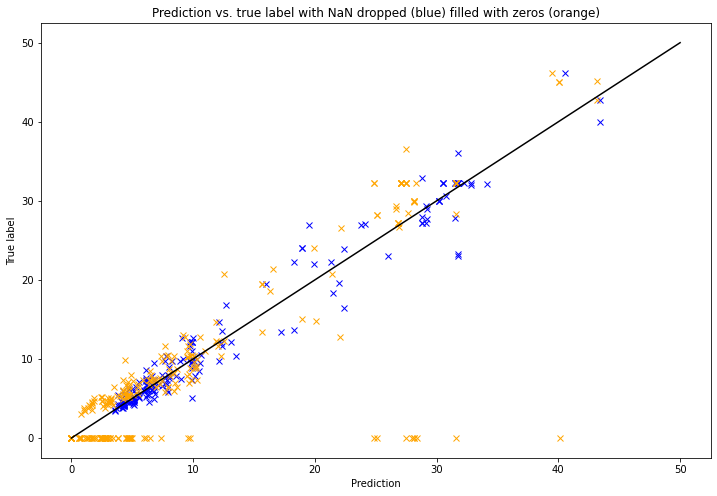

In [11]:
plt.figure(figsize = (12, 8))

# Missing values dropped
pred = []
for element in pred2:
    pred.append(element[0])
plt.plot(pred, ytest2, 'x', color = 'blue')

# Missing values filled with zeros
pred = []
for element in pred1:
    pred.append(element[0])
plt.plot(pred, ytest1, 'x', color = 'orange')

x = np.linspace(0, 50, 50)
plt.plot(x, x, color = 'black')

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label with NaN dropped (blue) filled with zeros (orange)')

In [12]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']
x = ['Length']
y = ['Width']
pred1, ytest1 = knn_regression(static_data, x, y)
pred2, ytest2 = knn_regression(static_selected, x, y)

def plot_2att(mode):
    
    plt.figure(figsize = (12, 8))
    
    if mode == 'filled_zeros':
        pred = []
        for element in pred1:
            pred.append(element[0])
        plt.plot(pred, ytest1, 'x')
        title = 'Prediction vs. true label with NaN filled with zero values'
    elif mode == 'drop_na':
        pred = []
        for element in pred2:
            pred.append(element[0])
        plt.plot(pred, ytest2, 'x')
        title = 'Prediction vs. true label with NaN dropped'
        
    x = np.linspace(0, 50, 50)
    plt.plot(x, x, color = 'black')

    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(title)

interact(plot_2att,
         mode = widgets.Dropdown(options = modes,
                                 value = modes[0],
                                 description = 'Mode:',
                                 disabled = False,))

interactive(children=(Dropdown(description='Mode:', options=('filled_zeros', 'drop_na'), value='filled_zeros')…

<function __main__.plot_2att(mode)>

From these visualizations, it is clear that in the case where the missing values were filled with zeros, the model didn't give much zero predictions. It is then understandable that the error was greater in the case were the missing values were replaced with zeros: the prediction gave "normal" values, following the diagonal of the distribution of the attributes length vs. width, instead of giving zero values, which are considered as the true values.

As a reminder, the mean absolute error is the average of the difference between the prediction and the actual value. If the actual value is 0, the error is the value of the prediction, which tends to increase the error easily.

## What is the best scenario?

To make a choice on how to deal with missing values in that case, we have to connect our analyzis to the meaning of the problem: if we choose to replace the missing values with zero values, this implies that we have zero values in our test set. The test set is the dataset that is compared with the data we would have in the real world, and we would make predictions on.

A zero value for the length or width of a ship is not a natural value: you will never find a ship with a length of 0 meters. So in that case, replacing missing values with zero does not make much sense and we can think that dropping the missing values is the best solution for creating a model that comes closest to a real-world situation.

## Quiz

In [1]:
from IPython.display import IFrame
IFrame("https://blog.hoou.de/wp-admin/admin-ajax.php?action=h5p_embed&id=53", "836", "437")